Two other reccurent layers in Keras are: `LSTM` and `GRU`. In practice these will be the reccurent layers to use as the SimpleRNN has a major issue: though it should theoretically be able to retain at time t information about inputs seen many timesteps before, in practice such long-term dependencies are impossible to learn. This is due to the vanishing gradient problem. This is similar to what is observed  with non-recurrent networks that are many layers deep. As more layers are added to the network, the network eventually becomes untrainable. `LSTM` and `GRU` were designed to solve this problem.

LSTM stands for Long Short-Term Memory and was developed in 1997. It was the culmination of their research on the vanishing gradient problem. It is a varient of the SimpleRNN layer and it adds a way of carrying information across many timesteps. It accomplishes this like a conveyor belt running parallel to the sequences currently being processed. Information from the sequence can jump onto the conveyor belt at anytime, be transported to a later timestep, and jump off, intact, when ou need it. An LSTM can save information for later use, this preventing older signals from gradually vanishing during processing.

Usecases where the LSTM's performance will shine is in question answering and machine translation.

# LSTM in Keras on the IMDB dataset

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
     num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Using TensorFlow backend.


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [2]:
from keras.layers import LSTM, Embedding, LSTM, Dense
from keras.models import Sequential
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 79s 4ms/step - loss: 0.4940 - acc: 0.7694 - val_loss: 0.3688 - val_acc: 0.8548
Epoch 2/10
20000/20000 [==============================] - 79s 4ms/step - loss: 0.2926 - acc: 0.8855 - val_loss: 0.3122 - val_acc: 0.8650
Epoch 3/10
20000/20000 [==============================] - 79s 4ms/step - loss: 0.2391 - acc: 0.9084 - val_loss: 0.2948 - val_acc: 0.8762
Epoch 4/10
20000/20000 [==============================] - 86s 4ms/step - loss: 0.2048 - acc: 0.9239 - val_loss: 0.3103 - val_acc: 0.8660
Epoch 5/10
20000/20000 [==============================] - 80s 4ms/step - loss: 0.1753 - acc: 0.9352 - val_loss: 0.3141 - val_acc: 0.8840
Epoch 6/10
20000/20000 [==============================] - 101s 5ms/step - loss: 0.1620 - acc: 0.9409 - val_loss: 0.3431 - val_acc: 0.8548
Epoch 7/10
20000/20000 [==============================] - 99s 5ms/step - loss: 0.1503 - acc: 0.9469 - val_loss: 0.5528 - val_acc

# Plot the performace of the LSTM
From above we can see the LSTM reaches about 88% accuracy.

In [3]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

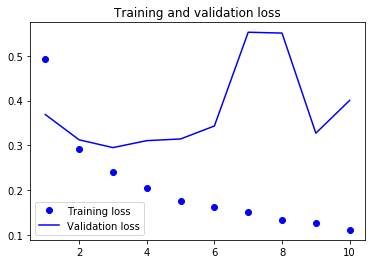

In [4]:
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

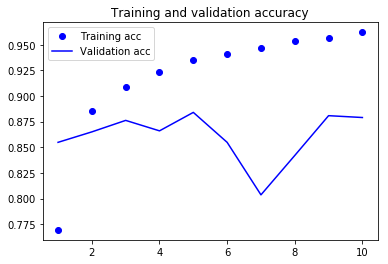

In [5]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

In [6]:
test_loss, test_acc = model.evaluate(input_test, y_test)

25000/25000 [==============================] - 62s 2ms/step


## The test accuracy of the model is around 85%
One reason the LSTM isn't performing betwee is that we did not make an effort to tune the hyperparameters such as the embedding dimensionality or the LSTM dimensionality.

In [7]:
print ('test accuracy is: ', test_acc, test_loss)

test accuracy is:  0.86084 0.46922305010318754
